<a href="https://colab.research.google.com/github/valenmonsalveu/Int_Artificial_Proyecto/blob/main/01_exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Competencia kaggle**
- Descargar la base de datos desde Kaggle


In [1]:
# Instrucciones para descargar y configurar el dataset desde Kaggle:
# 1. Obtén tu archivo kaggle.json desde tu cuenta de Kaggle:
#    - Ir a Kaggle > Cuenta > Crear nuevo API Token.
#    - Esto descargará un archivo kaggle.json en tu computadora.
#
# 2. Sube el archivo kaggle.json a Google Colab usando el siguiente código:
from google.colab import files
files.upload()

import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242


Saving kaggle.json to kaggle.json
 84% 17.0M/20.1M [00:00<00:00, 43.3MB/s]
100% 20.1M/20.1M [00:00<00:00, 44.4MB/s]


**inspeccion de datos**

In [2]:
!unzip udea*.zip > /dev/null

In [3]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  50135751 test.csv
   692501  10666231 118025055 train.csv
  1286075  15528571 172877479 total


**cargar la base de datos train.csv con pandas**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)

z.head()

shape of loaded dataframe (692500, 12)


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


**Exloracion de datos**

In [5]:
# 1. Información general sobre el dataframe
print("\nInformación general del dataframe:")
print(z.info())


Información general del dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 7   FAMI_TIENEINTERNET              665871 non-null  object
 8   FAMI_EDUCACIONPADRE             669322 non-null  object
 9   FAMI_EDUCACIONMADRE             668836 non-null  object
 10  ESTU_PAGOMATRICULAPROPIO        686002 non-null  object
 11  RENDIMIENTO_GLOBAL              692500 non-null  object

**Numero de estudiantes con  y sin internet**

In [6]:
if 'FAMI_TIENEINTERNET' in z.columns:
    print("\nNúmero de estudiantes con y sin internet:")
    print(z['FAMI_TIENEINTERNET'].value_counts())


Número de estudiantes con y sin internet:
FAMI_TIENEINTERNET
Si    592514
No     73357
Name: count, dtype: int64


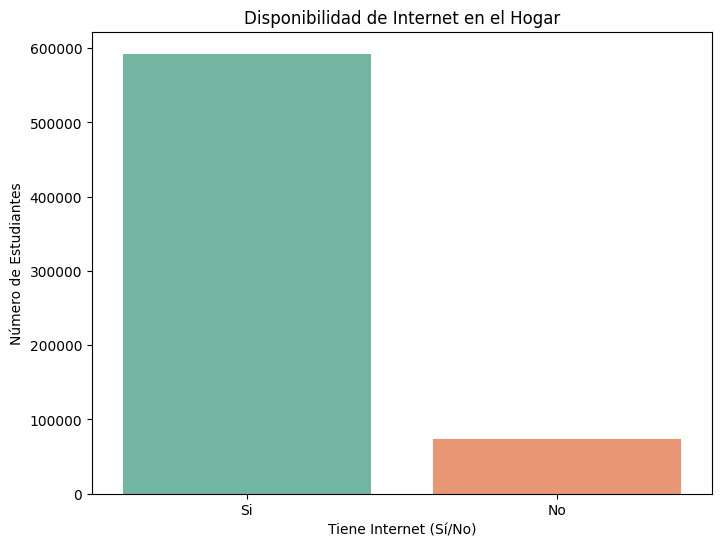

In [7]:
# Gráfico de barras para si los estudiantes tienen o no internet
plt.figure(figsize=(8,6))
sns.countplot(x='FAMI_TIENEINTERNET', hue='FAMI_TIENEINTERNET', data=z, palette="Set2", legend=False)
plt.title('Disponibilidad de Internet en el Hogar')
plt.xlabel('Tiene Internet (Sí/No)')
plt.ylabel('Número de Estudiantes')
plt.show()


**Numero de estudiantes por estrato de vivienda**

In [8]:
# Contar el número de estudiantes por estrato de vivienda
if 'FAMI_ESTRATOVIVIENDA' in z.columns:
    print("\nNúmero de estudiantes por estrato de vivienda:")
    print(z['FAMI_ESTRATOVIVIENDA'].value_counts())


Número de estudiantes por estrato de vivienda:
FAMI_ESTRATOVIVIENDA
Estrato 2      232671
Estrato 3      210685
Estrato 1      111991
Estrato 4       65514
Estrato 5       23608
Estrato 6       12605
Sin Estrato      3289
Name: count, dtype: int64


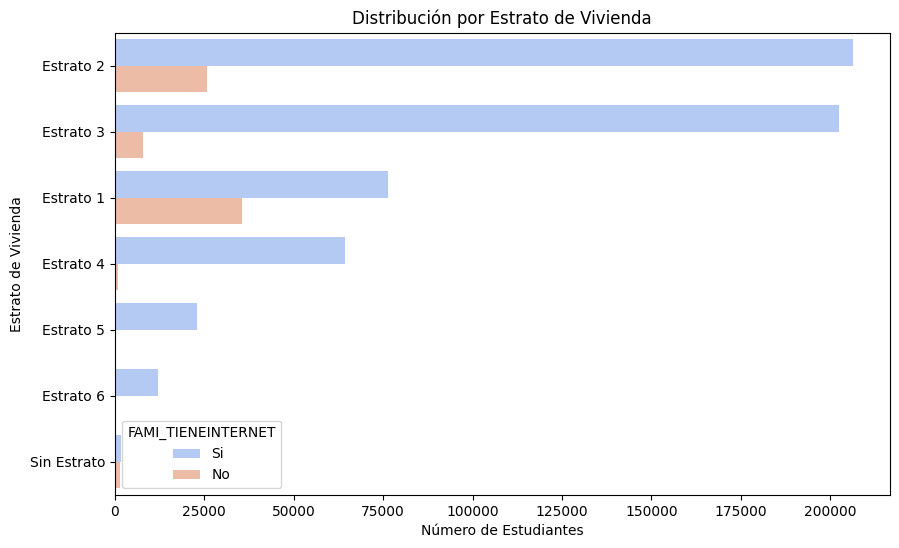

In [9]:
# Gráfico de barras para el estrato de vivienda (FAMI_ESTRATOVIVIENDA)
plt.figure(figsize=(10,6))
sns.countplot(y='FAMI_ESTRATOVIVIENDA', hue='FAMI_TIENEINTERNET', data=z, palette="coolwarm", order=z['FAMI_ESTRATOVIVIENDA'].value_counts().index)
plt.title('Distribución por Estrato de Vivienda')
plt.xlabel('Número de Estudiantes')
plt.ylabel('Estrato de Vivienda')
plt.show()


**Numero de estudiantes por departamento**

In [10]:
# Contar el número de estudiantes por departamento
if 'ESTU_PRGM_DEPARTAMENTO' in z.columns:
    print("\nNúmero de estudiantes por departamento:")
    print(z['ESTU_PRGM_DEPARTAMENTO'].value_counts())



Número de estudiantes por departamento:
ESTU_PRGM_DEPARTAMENTO
BOGOTÁ             282159
ANTIOQUIA           83607
VALLE               44588
ATLANTICO           41020
SANTANDER           28828
NORTE SANTANDER     22588
BOLIVAR             20629
BOYACA              14048
CUNDINAMARCA        14018
NARIÑO              13454
RISARALDA           12679
CORDOBA             12188
TOLIMA              11921
CALDAS              11640
CAUCA               11471
HUILA                9995
MAGDALENA            9512
SUCRE                8674
CESAR                8279
QUINDIO              8229
META                 7910
LA GUAJIRA           4778
CHOCO                4289
CAQUETA              2659
CASANARE             1852
PUTUMAYO              795
ARAUCA                589
AMAZONAS               40
GUAVIARE               37
VAUPES                 14
SAN ANDRES             10
Name: count, dtype: int64


**Gráfico de barras para estudiantes por departamentos**

<ipython-input-11-c92c19f20a0d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='ESTU_PRGM_DEPARTAMENTO', data=z, palette="plasma", order=z['ESTU_PRGM_DEPARTAMENTO'].value_counts().index)


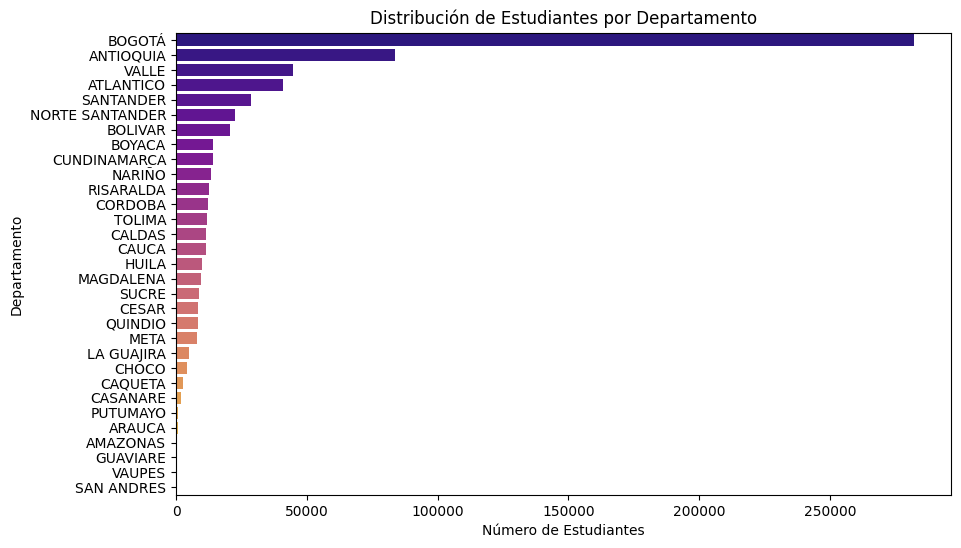

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# Gráfico de barras para numero de estudiantes por departamento
plt.figure(figsize=(10,6))
sns.countplot(y='ESTU_PRGM_DEPARTAMENTO', data=z, palette="plasma", order=z['ESTU_PRGM_DEPARTAMENTO'].value_counts().index)
plt.title('Distribución de Estudiantes por Departamento')
plt.xlabel('Número de Estudiantes')
plt.ylabel('Departamento')
plt.show()